# **Partie CNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import tarfile
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# os.listdir("gdrive/My Drive/")

Mounted at /content/gdrive


['images.tar']

In [ ]:
# tar = tarfile.open('gdrive/My Drive/images.tar', "r:")
# tar.extractall()
# tar.close()

In [ ]:
dog_classes = os.listdir('./Images/')

In [ ]:
breeds = [breed.split('-',1)[1] for breed in dog_classes]
breedsNumber = [breed.split('-',1)[0] for breed in dog_classes]

# **Mise en place des dossiers contenant les images**

In [ ]:
# for i in range(0, len(breeds)):
#     path, dirs, files = next(os.walk('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i])))
#     file_count = len(files)
    
#     train_percentage = round((60 * file_count) / 100)
#     valid_percentage = round((30 * file_count) / 100)
#     test_percentage  = round((10 * file_count) / 100)
    
#     total_percentage = train_percentage + valid_percentage + test_percentage
    
#     if total_percentage > file_count:
#         test_percentage = total_percentage - file_count
    
#     if os.path.isdir('./data2/train/' + str(breedsNumber[i]) + "-" + str(breeds[i])) is False:
#         os.makedirs('./data2/train/' + str(breedsNumber[i]) + "-" + str(breeds[i]))
#         os.makedirs('./data2/valid/' + str(breedsNumber[i]) + "-" + str(breeds[i]))
#         os.makedirs('./data2/test/' + str(breedsNumber[i]) + "-" + str(breeds[i]))
        
#         for j in random.sample(glob.glob('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i]) + '/*'), train_percentage):
#             shutil.move(j, './data2/train/' + str(breedsNumber[i]) + "-" + str(breeds[i] + "/"))
#         for j in random.sample(glob.glob('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i]) + '/*'), valid_percentage):
#             shutil.move(j, './data2/valid/' + str(breedsNumber[i]) + "-" + str(breeds[i] + "/"))
#         for j in random.sample(glob.glob('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i]) + '/*'), test_percentage):
#             shutil.move(j, './data2/test/' + str(breedsNumber[i]) + "-" + str(breeds[i] + "/"))

# **Data Augmentation**

In [ ]:
train_path = './data2/train/'
valid_path = './data2/valid/'
test_path  = './data2/test/'

train_batches = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=dog_classes, batch_size=20)
valid_batches = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=dog_classes, batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=dog_classes, batch_size=20, shuffle=False)

Found 12345 images belonging to 120 classes.
Found 6176 images belonging to 120 classes.
Found 1887 images belonging to 120 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

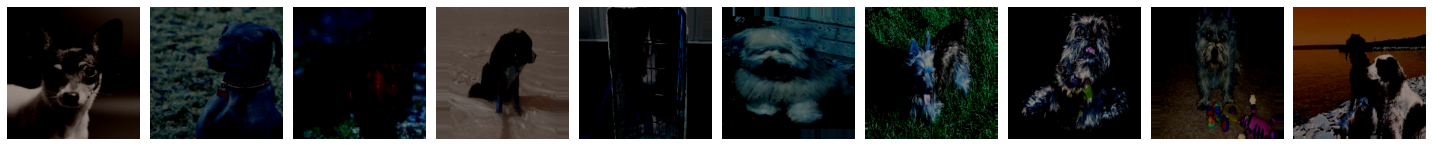

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
plotImages(imgs)

print(labels)

# **Création du Model**

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=120, activation='softmax')
])

print(model.summary())

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_261 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_194 (MaxPoolin (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_195 (MaxPoolin (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 200704)            0         
_________________________________________________________________
dense_94 (Dense)             (None, 120)               24084600  
Total params: 24,103,992
Trainable params: 24,103,992
Non-trainable params: 0
_________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Entrainement du model**

In [ ]:
history = model.fit(x = train_batches,
    steps_per_epoch = train_batches.samples / 20,
    validation_data = valid_batches,
    validation_steps = valid_batches.samples / 20,
    batch_size=20,
    epochs = 10)

Epoch 1/10
617/617 [==============================] - 228s 369ms/step - loss: 4.7303 - accuracy: 0.0254 - val_loss: 4.3744 - val_accuracy: 0.0576
Epoch 2/10
617/617 [==============================] - 226s 366ms/step - loss: 4.1460 - accuracy: 0.0920 - val_loss: 4.2403 - val_accuracy: 0.0777
Epoch 3/10
617/617 [==============================] - 225s 364ms/step - loss: 3.8546 - accuracy: 0.1461 - val_loss: 4.1939 - val_accuracy: 0.0925
Epoch 4/10
617/617 [==============================] - 226s 366ms/step - loss: 3.6116 - accuracy: 0.1885 - val_loss: 4.1888 - val_accuracy: 0.0991
Epoch 5/10
617/617 [==============================] - 225s 364ms/step - loss: 3.3476 - accuracy: 0.2326 - val_loss: 4.2201 - val_accuracy: 0.1074
Epoch 6/10
617/617 [==============================] - 225s 364ms/step - loss: 3.0903 - accuracy: 0.2880 - val_loss: 4.2574 - val_accuracy: 0.1078
Epoch 7/10
617/617 [==============================] - 225s 364ms/step - loss: 2.9005 - accuracy: 0.3337 - val_loss: 4.3424 -

# **Graphique CNN**

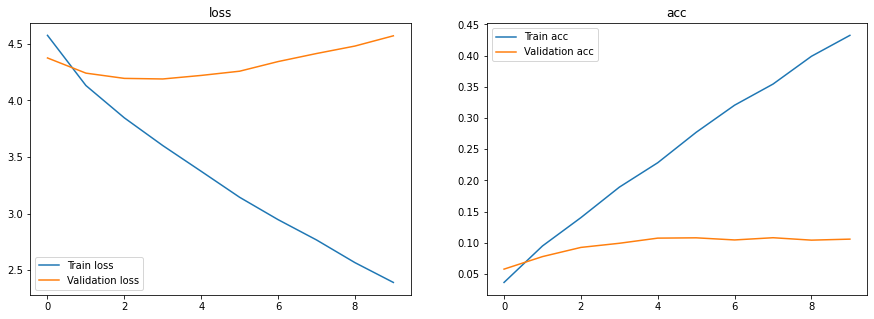

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('acc')
ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()

# **Partie Transfer Learning**

In [109]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

import cv2

In [110]:
BASEPATH = "./data2/train/"

LABELS = set()

paths = []
    
for d in os.listdir(BASEPATH):
    LABELS.add(d)
    paths.append((BASEPATH+d, d))

In [111]:
# resizing and converting to RGB
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# **Preprocessing**

In [112]:
X = []
y = []

for path, label in paths:
    for image_path in os.listdir(path):
        image = load_and_preprocess_image(path+"/"+image_path)
        
        X.append(image)
        y.append(label)

In [173]:
encoder = LabelBinarizer()

X = np.array(X)
y = encoder.fit_transform(np.array(y))

(12345, 224, 224, 3)
(12345, 120)


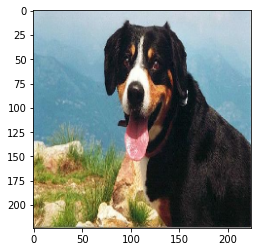

In [114]:
print(X.shape)
print(y.shape)
plt.imshow(X[0])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

# **Création du model VGG16**

In [116]:
base_model=VGG16(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
preds=Dense(len(120),activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:-5]:
    layer.trainable=False
for layer in model.layers[-5:]:
    layer.trainable=True
    
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [117]:
early_stopping = EarlyStopping(patience=5, verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)

# **Entrainement du model**

In [118]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size=64, 
    epochs=20, 
    validation_data=(X_test,y_test),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/20
174/174 [==============================] - 55s 313ms/step - loss: 4.8459 - accuracy: 0.0811 - val_loss: 2.3403 - val_accuracy: 0.3717
Epoch 2/20
174/174 [==============================] - 56s 320ms/step - loss: 2.4180 - accuracy: 0.3458 - val_loss: 2.1068 - val_accuracy: 0.4089
Epoch 3/20
174/174 [==============================] - 56s 322ms/step - loss: 1.9338 - accuracy: 0.4439 - val_loss: 1.9502 - val_accuracy: 0.4632
Epoch 4/20
174/174 [==============================] - 56s 323ms/step - loss: 1.6647 - accuracy: 0.5195 - val_loss: 1.8837 - val_accuracy: 0.4729
Epoch 5/20
174/174 [==============================] - 56s 323ms/step - loss: 1.3878 - accuracy: 0.5810 - val_loss: 1.8884 - val_accuracy: 0.4769
Epoch 6/20
174/174 [==============================] - 56s 322ms/step - loss: 1.2637 - accuracy: 0.6254 - val_loss: 1.8710 - val_accuracy: 0.4947
Epoch 7/20
174/174 [==============================] - 56s 322ms/step - loss: 1.0457 - accuracy: 0.6770 - val_loss: 1.8759 - val_ac

# **Graphique VGG16**

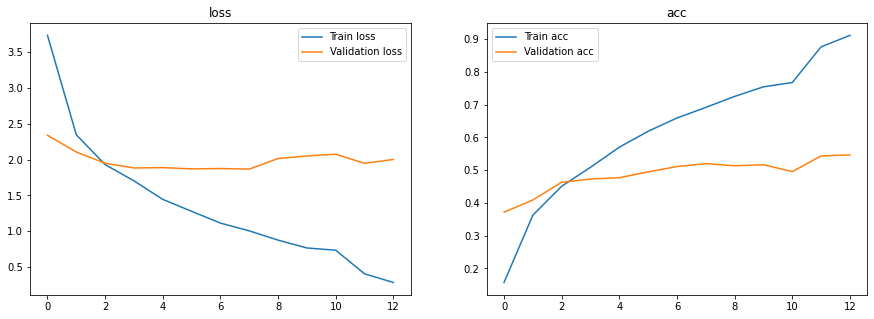

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('acc')
ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()

In [103]:
print(f"loss on the test set is {loss:.2f}")
print(f"accuracy on the test set is {acc:.3f}")

loss on the test set is 1.80
accuracy on the test set is 0.567


In [121]:
predictions = model.predict(X_test)

In [122]:
label_predictions = encoder.inverse_transform(predictions)

# **Prédiction du model**

In [134]:
rows, cols = 2, 3
size = 25

fig,ax=plt.subplots(rows,cols)
fig.set_size_inches(size,size)
for i in range(rows):
    for j in range (cols):
        index = np.random.randint(0,len(X_test))
        ax[i,j].imshow(X_test[index])
        ax[i,j].set_title(f'Predicted: {label_predictions[index]}\n Actually: {encoder.inverse_transform(y_test)[index]}')
        
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

# **Saving Model**

In [133]:
model.save("./model.h5")